<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#logistic_regresion">Simple Logistic Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

# Importing necessary Libraries

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import plotly.express as px
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import log_loss, accuracy_score

# Downloading Data of hight_weight_gender from Github

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv")

# Let's Checkout Our Data

In [5]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Let's See what kind of Coulmn Types we have

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## So in this Data we have to do pridictive analysis to predict gender of a person on the basis of `Weight(pounds)` and `Hight(inches)`

In [132]:
data2= data.copy()

## Converting the Gender column's classes in to Binary `0 = Male` and `1 = Female`

In [133]:
data2["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [136]:
data2["Gender"]= data2[["Gender"]].applymap(lambda v: 0 if v=="Male" else 1)

In [138]:
data2

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


In [185]:
corr = data2.corr()

# Cheaking Colinearity between features and lable

In [186]:
corr

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


In [85]:
pipeline = Pipeline([
    ("scaling", StandardScaler()),
#     ("imputer", SimpleImputer("median"))
])

# So it's Time to split the Data into `x_train,x_test,y_train,y_test`

In [195]:
x_train,x_test,y_train,y_test = train_test_split(data2.drop("Gender",axis=1),data2["Gender"],random_state=42,test_size=0.2)

In [196]:
x_train

,Height,Weight
9254,61.391644,120.681907
1561,74.697637,209.373126
1670,68.507815,200.877279
6087,65.797516,134.342745
6669,67.161806,160.201031
...,...,...
5734,63.349988,139.223151
5191,58.861625,90.728561
5390,64.325406,156.800504
860,69.074492,179.386817


# Let's Plot the Data and see the scatterness of Weight and hight 

In [197]:
plot = px.scatter(x_train) 
plot.show()

In [148]:
x_train.head()

,Height,Weight
9254,61.391644,120.681907
1561,74.697637,209.373126
1670,68.507815,200.877279
6087,65.797516,134.342745
6669,67.161806,160.201031


In [149]:
x_train.shape

(8000, 2)

In [150]:
x_test.head()

,Height,Weight
6252,68.687232,173.115813
4684,68.829334,195.162042
1731,66.398128,170.217451
4742,71.929340,215.049660
4521,67.042903,182.721452


In [151]:
x_test.shape

(2000, 2)

In [152]:
y_train.head()

9254    1
1561    0
1670    0
6087    1
6669    1
Name: Gender, dtype: int64

# Applying Logistic regression algorithm to do predictive analysis

In [153]:
clf =LogisticRegression(C=1e40, solver='newton-cg')


In [154]:
# x_train = pipeline.fit_transform(x_train)
clf.fit(x_train,y_train)

LogisticRegression(C=1e+40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
from sklearn.metrics import confusion_matrix


# Checking `FP,FN,TP,TN`

## And we are getting a lot of FP and FN

In [156]:
confusion_matrix(y_train, clf.predict(x_train))

array([[3662,  326],
       [ 331, 3681]], dtype=int64)

In [157]:
for i in clf.predict(x_train)[:20]:
    print(i)

1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
0
1


In [158]:
y_train[:20]

9254    1
1561    0
1670    0
6087    1
6669    1
5933    1
8829    1
7945    1
3508    0
2002    0
5866    1
168     0
2588    0
5905    1
9529    1
6384    1
7824    1
9779    1
4629    0
8560    1
Name: Gender, dtype: int64

# To improve the performance of the model lets try doing Hyperparameter tuning to find best fit model

In [159]:
param_grid = [
    { 'solver': ["newton-cg", "lbfgs"], 
      'C': [1, 2, 3,4, 5, 6, 7, 8, 9, 10],
      "multi_class": [ 'multinomial' ],
     "max_iter" : [ 100, 200, 300, 400, 500 ]
    }
]

In [160]:
log_reg = LogisticRegression()
grid_search = GridSearchCV( log_reg, param_grid,
                            cv=10, 
                           scoring='neg_log_loss',
                           return_train_score=True
                            )

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_iter': [100, 200, 300, 400, 500],
                          'multi_class': ['multinomial'],
                          'solver': ['newton-cg', 'lbfgs']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_l

In [162]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

In [163]:
model=grid_search.best_estimator_

In [164]:
model.predict(x_train)[:20]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [165]:
y_train[:20]

9254    1
1561    0
1670    0
6087    1
6669    1
5933    1
8829    1
7945    1
3508    0
2002    0
5866    1
168     0
2588    0
5905    1
9529    1
6384    1
7824    1
9779    1
4629    0
8560    1
Name: Gender, dtype: int64

# Same performance like we got earlier

In [167]:
confusion_matrix(y_train,model.predict(x_train))

array([[3662,  326],
       [ 331, 3681]], dtype=int64)

In [168]:
vir = x_train[y_train == 1]
y_vir = y_train[y_train==1]
nvir = x_train[y_train == 0]
y_nvir = y_train[y_train == 0]

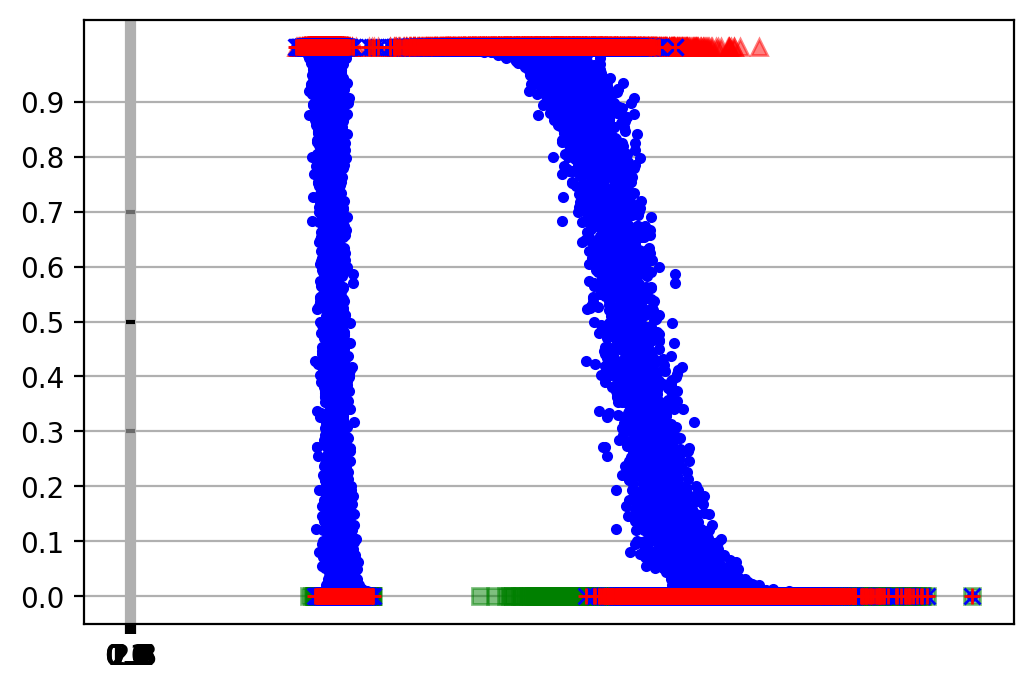

In [191]:
plt.figure(dpi=200)

prob = model.predict_proba(x_train)[:, 1]

p_0_3 = prob > 0.5

plt.plot(vir, y_vir, 'r^', alpha=0.5)
plt.plot(nvir, y_nvir, 'gs', alpha=0.5)
plt.plot(x_train, model.predict(x_train), 'bx')

plt.plot(x_train, prob, 'b.')
plt.plot(x_train, p_0_3, 'r+')
plt.grid()
plt.yticks(np.arange(0, 1, .1))
plt.xticks(np.arange(0, 3, .2))
plt.plot([0, 3], [0.5, 0.5], 'k--', alpha=1)
plt.plot([0, 3], [0.7, 0.7], 'k--', alpha=0.4)
plt.plot([0, 3], [0.3, 0.3], 'k--', alpha=0.4)
#plt.plot([1.65, 1.65], [0, 1], 'k--')
plt.show()

<Figure size 1200x800 with 0 Axes>

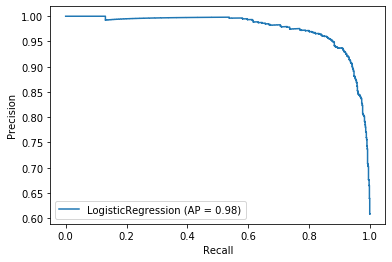

In [184]:
disp = plot_precision_recall_curve(model, x_test, y_test)
# disp.ax_.set_title('2-class Precision-Recall curve:))

# Accuracy on Train Data itself

In [200]:
accuracy_score(y_train, model.predict(x_train))

0.917875

# Accuracy on Test Data

In [201]:
accuracy_score(y_test, model.predict(x_test))

0.924